### Problem Statement


The dataset contains the temperature, humidity, pressure, and so on recorded from different rooms. The data is collected from the sensors that are implanted in different houses. **The house temperature and humidity were monitored using a wireless sensor network. We aim is predict the energy used by the appliances in Wh.**

#### About the dataset (Appliances Energy Prediction data)

* Appliances: Energy use in Wh (Target Variable)
* lights: Energy use of light fixtures in the house in Wh
* T1: Temperature in the kitchen area in Celsius
* RH_1: Humidity in the kitchen area in %
* T2: Temperature in the living room area in Celsius
* RH_2: Humidity in the living room area in %
* T3: Temperature in the laundry room area
* RH_3: Humidity in the laundry room area in %
* T4: Temperature in the office room in Celsius
* RH_4: Humidity in the office room in %
* T5: Temperature in the bathroom in Celsius
* RH_5: Humidity in the bathroom in %
* T6: Temperature outside the building (north side) in Celsius
* RH_6: Humidity outside the building (north side) in %
* T7: Temperature in ironing room in Celsius
* RH_7: Humidity in ironing room in %
* T8: Temperature in teenager room 2 in Celsius
* RH_8: Humidity in teenager room 2 in %
* T9: Temperature in parents room in Celsius
* RH_9: Humidity in parents room in %
* T_out: Temperature outside th
From Faculty (Olympus) to Everyone:  11:59 AM
* Pres_mm_hg: Pressure in mm Hg
* RH_out: Humidity outside the building in %
* Windspeed: Speed of the wind in m/s
* Visibility: Visibility of the building from the nearest weather station in km


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import functions to perform feature selection
#from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Plotting Parameters
plt.rcParams['figure.figsize'] = [15,8]

In [3]:
energy = pd.read_csv('energy_data.csv')

In [4]:
energy.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility
0,60,20,20.700000,44.700000,19.500000,45.590000,21.390000,41.95,20.566667,45.626667,...,43.290000,20.500000,52.790000,18.306667,47.590000,11.016667,756.533333,88.333333,8.833333,38.166667
1,60,0,21.290000,37.863333,19.390000,39.663333,21.790000,36.70,20.463333,37.526667,...,32.095000,22.000000,39.223333,19.600000,38.826667,8.350000,761.800000,70.000000,3.500000,40.000000
2,80,0,21.390000,35.790000,19.290000,37.700000,22.760000,34.29,21.323333,34.730000,...,29.200000,22.390000,37.290000,19.463333,35.500000,6.866667,762.333333,69.666667,3.000000,35.666667
3,40,0,19.033333,41.826667,18.533333,41.290000,18.100000,43.79,15.890000,47.530000,...,40.138889,19.594444,51.062778,15.100000,46.760000,5.133333,769.583333,92.000000,4.833333,23.166667
4,60,30,21.700000,46.633333,20.700000,45.900000,22.323333,44.79,21.000000,47.966667,...,45.200000,20.469444,53.189444,18.290000,51.863333,8.633333,757.566667,95.666667,6.000000,55.333333


In [6]:
energy.shape

(1000, 25)

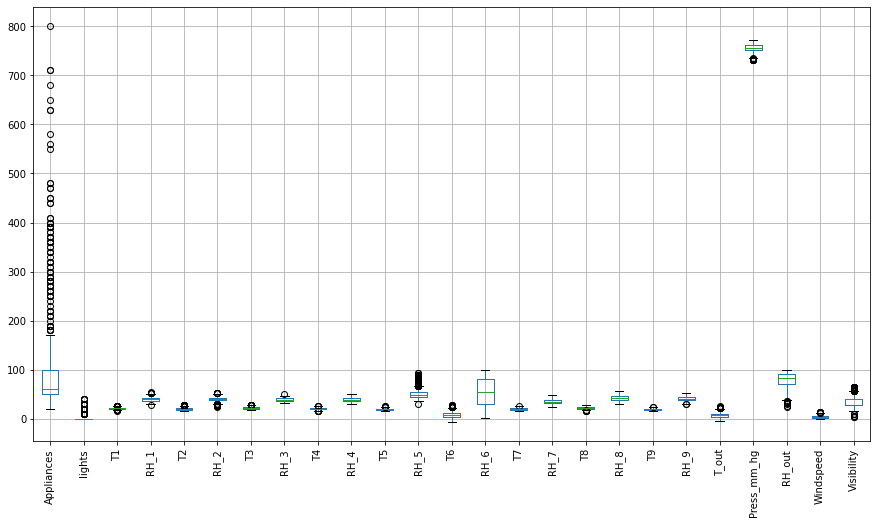

In [5]:
# Outliers
energy.boxplot()
plt.xticks(rotation = 90)
plt.show()

Since, Appliance and Press_mm_HG are the highest value holders, they are clearly an outlier. Now we will remove this and we will see the distribution of remaining variables

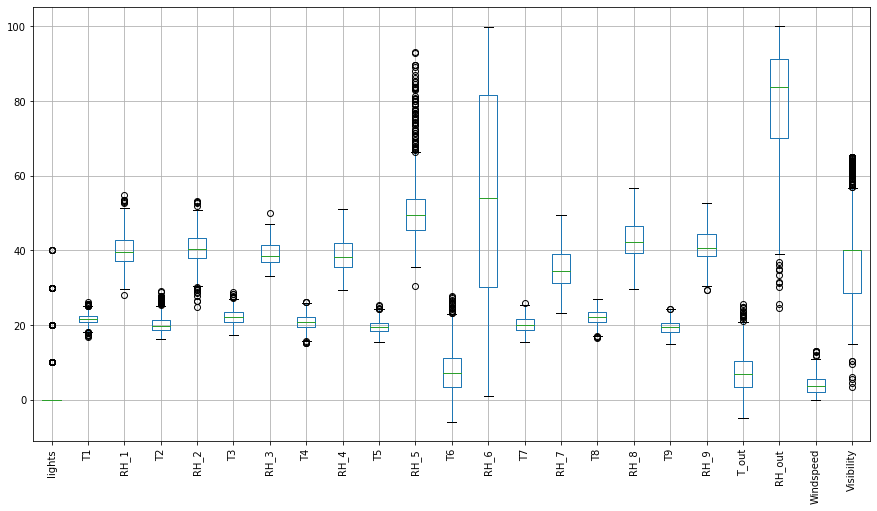

In [7]:
# Looking at the other variables without the TGT & Pressure...
energy.drop(["Appliances", "Press_mm_hg"], axis = 1).boxplot()
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:>

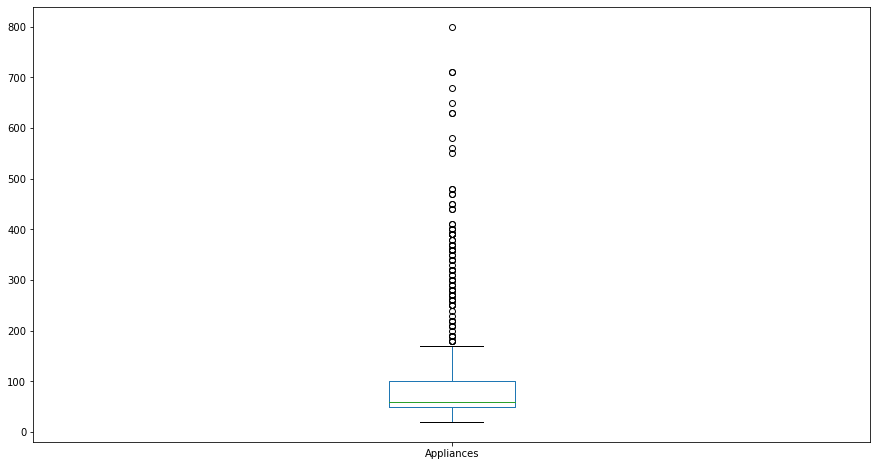

In [8]:
# Target Variable

energy.Appliances.plot(kind = "box")

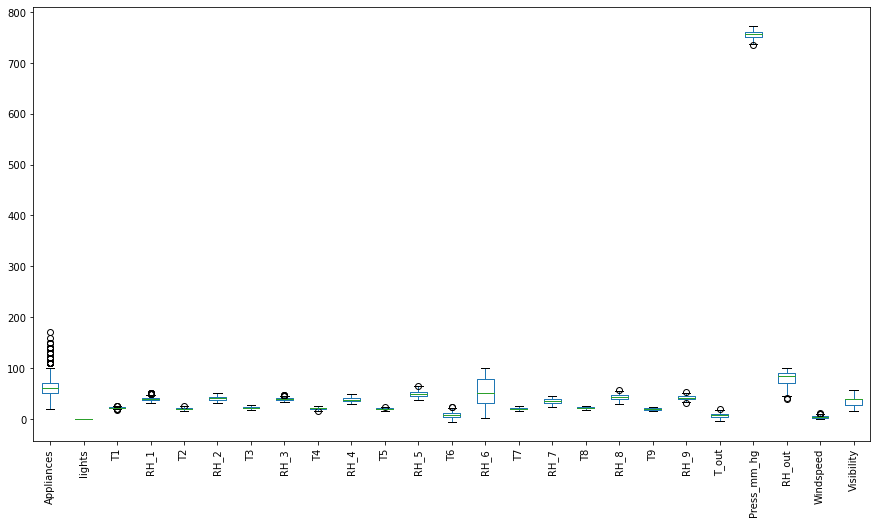

In [9]:
# Remove Outliers using Boxplots

# IQR - Q3 - Q1
Q1 = energy.quantile(0.25) #Quartile 01
Q3 = energy.quantile(0.75) #Quartile 03

IQR = Q3 - Q1

# Criterion: Values< Q1-1.5*IQR & Values > Q3+1.5*IQR

# 

#energy[~(energy>(Q3+1.5*IQR))].boxplot()
#plt.xticks(rotation = 90)
#plt.show()

# Remove the Outliers

# ~ ~ Return all the values which are not meeting the criterion
# or | use it for multiple conditions either of the two will be true. Both are true is not possible
# .any(axis = 1) checks the entire row for atleast one True Entry (True means rep outliers)

energy[~((energy < (Q1-1.5*IQR)) | (energy > (Q3+1.5*IQR))).any(axis = 1)].plot(kind = "box") #And, OR
plt.xticks(rotation = 90)
plt.show()

In [10]:
newenergy = energy[~((energy < (Q1-1.5*IQR)) | (energy > (Q3+1.5*IQR))).any(axis = 1)]

In [11]:
newenergy.shape

(543, 25)

<AxesSubplot:>

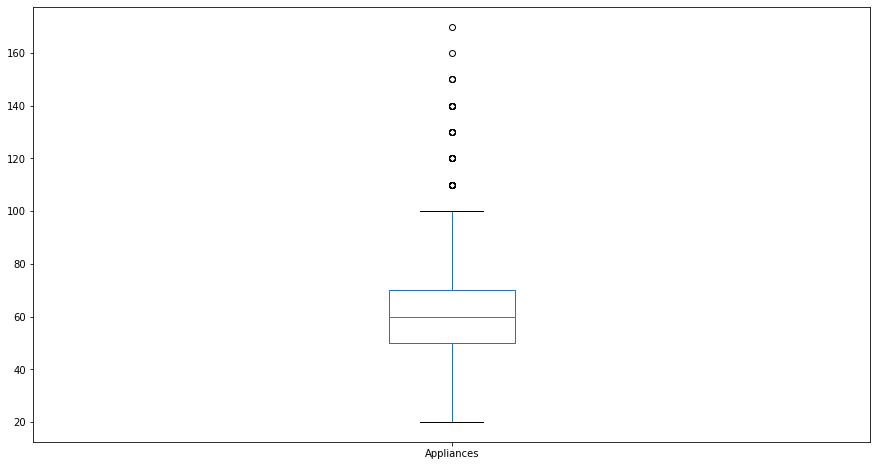

In [12]:
newenergy.Appliances.plot(kind = "box")

In [13]:
# Check the Missing Values

energy.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
dtype: int64

In [14]:
# Check the SD
newenergy.std()[newenergy.std()<1] # Values are around mean infact mean and it will not contribute

lights    0.0
dtype: float64

In [15]:
# Linear Regression Model

import statsmodels.api as sm

X = newenergy.drop(["Appliances", "lights"], axis = 1)
X = sm.add_constant(X) #Adding one constant

y = newenergy.Appliances # Target Variable

# Split the Data in Train and test

xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state = 1, test_size = 0.20)

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(434, 24)
(109, 24)
(434,)
(109,)


In [16]:
model = sm.OLS(ytrain, xtrain).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Appliances   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     9.663
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           1.09e-26
Time:                        20:16:19   Log-Likelihood:                -1942.0
No. Observations:                 434   AIC:                             3932.
Df Residuals:                     410   BIC:                             4030.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          30.5038    157.184      0.194      0.846    -278.484     339.492
T1              1.6850      3.239      0.520      0.603      -4.683       8.053
RH_1            5.7350      1.404      4.084      0.000       2.974       8.496
T2             -7.0984      2.915     -2.435      0.015     -12.829      -1.368
RH_2           -4.4119      1.387     -3.181      0.002      -7.139      -1.685
T3              4.7152      1.865      2.528      0.012       1.049       8.382
RH_3            0.0217      1.275      0.017      0.986      -2.485       2.528
T4              3.2258      2.027      1.591      0.112      -0.759       7.210
RH_4            1.0482      1.182      0.887      0.376      -1.275       3.372
T5              0.2366      2.129      0.111      0.912      -3.949       4.422
RH_5           -0.0046      0.275     -0.017      0.987      -0.546       0.537
T6              1.4891      0.949      1.569      0.117      -0.377       3.355
RH_6            0.0480      0.107      0.447      0.655      -0.163       0.259
T7             -4.4128      2.288     -1.928      0.055      -8.911       0.086
RH_7            0.5859      0.676      0.867      0.387      -0.743       1.915
T8             11.1364      1.670      6.667      0.000       7.853      14.420
RH_8           -2.9775      0.588     -5.061      0.000      -4.134      -1.821
T9             -8.3401      3.044     -2.740      0.006     -14.324      -2.356
RH_9           -0.8892      0.663     -1.341      0.181      -2.192       0.414
T_out          -0.5231      1.100     -0.476      0.634      -2.685       1.638
Press_mm_hg     0.0053      0.191      0.028      0.978      -0.371       0.381
RH_out          0.0488      0.192      0.255      0.799      -0.328       0.426
Windspeed       1.1656      0.592      1.969      0.050       0.002       2.329
Visibility     -0.0091      0.129     -0.071      0.943      -0.262       0.244
==============================================================================
Omnibus:                      128.702   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              428.410
Skew:                           1.340   Prob(JB):                     9.37e-94
Kurtosis:                       7.063   Cond. No.                     1.16e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
# test r2 score and RMSe

from sklearn.metrics import r2_score, mean_squared_error

print("R2 Score", r2_score(ytest, model.predict(xtest)))
print("RMSE Score", np.sqrt(mean_squared_error(ytest, model.predict(xtest))))

R2 Score 0.267895764354363
RMSE Score 19.178970998557517


In [18]:
# Assumptions

# Ho: Data is Linear
# Ho: Data isn't Linear

import statsmodels.api as sma
sma.stats.diagnostic.linear_rainbow(model) # Linearity is met.

(0.624669245829712, 0.9996121718905507)

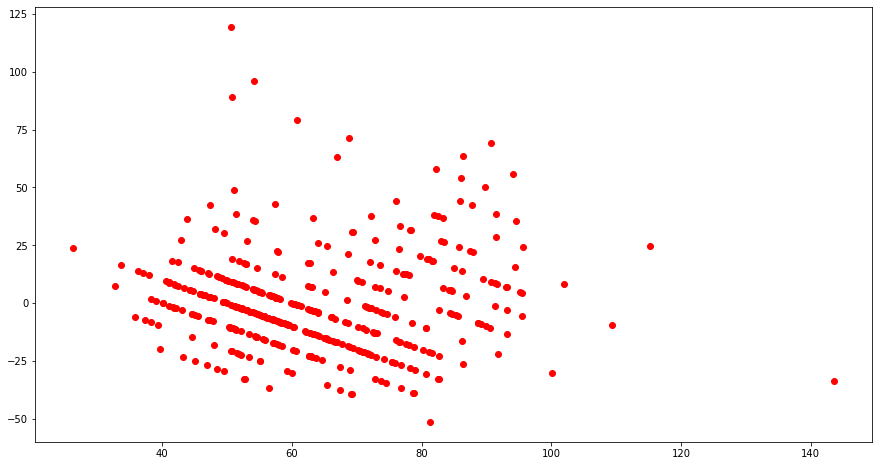

In [19]:
# Residplot
plt.scatter(model.fittedvalues, model.resid, color = "r")
plt.show()

In [20]:
# Normality

# Ho: Data/Residuals is Linear
# Ho: Data/Residuals isn't Linear

from scipy.stats import shapiro
shapiro(model.resid)

# Inference: Data is not Normal

ShapiroResult(statistic=0.9248566031455994, pvalue=6.296408571393117e-14)

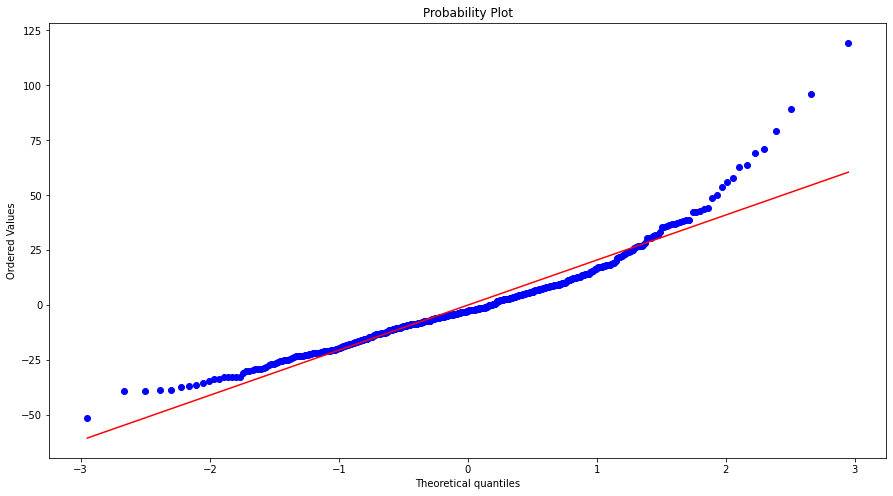

In [21]:
# Use Probplot to visualize the same
from scipy.stats import probplot
probplot(model.resid, plot = plt)
plt.show()

In [22]:
# VIF: Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# predictors only and not the target variable
df = newenergy.drop(["Appliances", "lights"], axis = 1)

mylist =[]

for i in range(df.shape[1]):
    mylist.append(variance_inflation_factor(df.values, i)) # VIF = 1/(1-R2score

In [23]:
pd.DataFrame({"Features": df.columns, "VIF":mylist}).sort_values(by = "VIF", ascending = False)

,Features,VIF
0,T1,4625.631971
2,T2,3317.245764
3,RH_2,3068.541540
1,RH_1,3061.694937
16,T9,2969.092992
5,RH_3,2089.000920
12,T7,1744.502736
4,T3,1659.385340
7,RH_4,1596.678462
6,T4,1548.095095


In [25]:
# Breusch Pagan - Heteroskedasticity & DW for Autocorrelation

from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.api import het_breuschpagan

print("DW Stats", durbin_watson(model.resid)) # NO Autocorrelation
teststats, pvalue, fstats, p_pvalue = het_breuschpagan(model.resid,xtrain) # endog, exog
print(pvalue)

DW Stats 1.9348012888147135
0.4776784093824873


### Model Diagnostics

*    Data is linear however, the test of normality is violated.
*    Check Transformation to find out if the normality is met.
*    Has Multicollinearity. May be feature engg can help and since most of the variables are MCollinear and hence, this proves that the regression is not a good fit for the data.

*    Residual Plot and found that there is some pattern which clearly signifies that the LR is not a good fit.

*    Data is not suffering from heteroskedasticity and there is no autocorrel of errors.



### Step wise Regression

*    RFE
*    SFS



In [26]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import GradientBoostingRegressor

ls = Lasso()
gbm = GradientBoostingRegressor()
# RFE: estimator, n_features_to_select = 10
rfe = RFE(estimator=ls, n_features_to_select=10)

# Fit and Transform
X_new = rfe.fit_transform(xtrain, ytrain)
colnos = rfe.get_support(indices = True)

print(xtrain.iloc[:, colnos].columns)
print("R Squared", rfe.score(xtrain, ytrain))

Index(['RH_1', 'RH_2', 'T3', 'T6', 'T7', 'T8', 'RH_8', 'T9', 'RH_9',
       'Windspeed'],
      dtype='object')
R Squared 0.31447496804291286


In [27]:
# Sequential Feature Selector - estimator, forward = True, k_features=(2,12), "best", cv =10, verbose = 0
SFS = sfs(estimator = ls, verbose=0, k_features = "best", 
    cv = 5, scoring = "r2")

sfsmodel = SFS.fit(xtrain,ytrain)
print("Features: ", sfsmodel.k_feature_names_)
print("R Squared: ", sfsmodel.k_score_)

Features:  ('const', 'RH_1', 'T2', 'RH_2', 'RH_6', 'T7', 'T8', 'RH_8', 'T9', 'RH_9', 'Windspeed')
R Squared:  0.28791123118993106


### Cross Validation

**Overfitting vs Underfitting**

*    Overfitting is result when we see less performance on test in comparison to train. It means that the model does well on training and does not perform well on testing

*    Underfitting is when the machine does not learn well from training and hence it does not do well on test as a result.


In [28]:
# Kfold

from sklearn.model_selection import KFold
n =10

# shuffle the data after every draw
# n splits - how many splits

kf = KFold(n_splits=n, shuffle = True)



Perform training repeatedly on each k-1 fold (xtrain, ytrain) & use the Kth Fold(xtest, ytest) for testing. Append the scores in the list container


In [29]:
# Defined X & y
df = energy.drop(["Appliances", "lights"], axis = 1)
y = energy.Appliances

for i in range(n):
    results = next(kf.split(df)) # can see what all folds are generated using list func.
    xtrain = df.iloc[results[0]]
    xtest = df.iloc[results[1]]
    ytrain = y.iloc[results[0]]
    ytest = y.iloc[results[1]]
    print("XTrain Dim:", "Fold", i, xtrain.shape)
    #print(xtrain.head())
    print("YTrain Dim:", "Fold", i, ytrain.shape)
    print("XTest Dim:", "Fold", i, xtest.shape)
    print("YTest Dim:", "Fold", i, ytest.shape)

XTrain Dim: Fold 0 (900, 23)
YTrain Dim: Fold 0 (900,)
XTest Dim: Fold 0 (100, 23)
YTest Dim: Fold 0 (100,)
XTrain Dim: Fold 1 (900, 23)
YTrain Dim: Fold 1 (900,)
XTest Dim: Fold 1 (100, 23)
YTest Dim: Fold 1 (100,)
XTrain Dim: Fold 2 (900, 23)
YTrain Dim: Fold 2 (900,)
XTest Dim: Fold 2 (100, 23)
YTest Dim: Fold 2 (100,)
XTrain Dim: Fold 3 (900, 23)
YTrain Dim: Fold 3 (900,)
XTest Dim: Fold 3 (100, 23)
YTest Dim: Fold 3 (100,)
XTrain Dim: Fold 4 (900, 23)
YTrain Dim: Fold 4 (900,)
XTest Dim: Fold 4 (100, 23)
YTest Dim: Fold 4 (100,)
XTrain Dim: Fold 5 (900, 23)
YTrain Dim: Fold 5 (900,)
XTest Dim: Fold 5 (100, 23)
YTest Dim: Fold 5 (100,)
XTrain Dim: Fold 6 (900, 23)
YTrain Dim: Fold 6 (900,)
XTest Dim: Fold 6 (100, 23)
YTest Dim: Fold 6 (100,)
XTrain Dim: Fold 7 (900, 23)
YTrain Dim: Fold 7 (900,)
XTest Dim: Fold 7 (100, 23)
YTest Dim: Fold 7 (100,)
XTrain Dim: Fold 8 (900, 23)
YTrain Dim: Fold 8 (900,)
XTest Dim: Fold 8 (100, 23)
YTest Dim: Fold 8 (100,)
XTrain Dim: Fold 9 (900, 23)

In [30]:
# Defined X & y
df = energy.drop(["Appliances", "lights"], axis = 1)
y = energy.Appliances

from sklearn.metrics import r2_score

# Function to calc R2Score
def r2scores(model, x_train, y_train, x_test,y_test):
    pred_model = model.fit(x_train, y_train).predict(x_test)
    return(r2_score(y_test,pred_model))

# K Fold CV

scores = []
lrfit = LinearRegression()

for i in range(n):
    results = next(kf.split(df)) # can see what all folds are generated using list func.
    xtrain = df.iloc[results[0]]
    xtest = df.iloc[results[1]]
    ytrain = y.iloc[results[0]]
    ytest = y.iloc[results[1]]
    scores.append(r2scores(lrfit, xtrain, ytrain, xtest, ytest))
    
# Print all the Scores
print("All Scores", np.round(scores,4))

# Print the Min Score
print("\nMin Score", np.round(np.min(scores), 4))

# MaxScore
print("MaxScore", np.round(np.max(scores), 4))

# Average & SD Score
print("Avg Score", np.round(np.mean(scores), 4))
print("SD Score", np.round(np.std(scores), 4))

All Scores [ 0.1425  0.0885  0.154   0.1777  0.1748  0.0391  0.2957  0.1302  0.0571
 -0.0346]

Min Score -0.0346
MaxScore 0.2957
Avg Score 0.1225
SD Score 0.0862


In [31]:
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold
n =5

# shuffle the data after every draw
# n splits - how many splits

#kf_ = KFold(n_splits=n, shuffle = True)
cross_val_score(estimator=lrfit, X = xtrain, y = ytrain, scoring = "r2", cv = 2).mean()

0.18246828188131442